Projet 9.2

# LA POULE QUI CHANTE  

# Clustering

# Problématique et contexte


Import du data frame normalisé 'df', ce dernier est issu du notebook précédent.

L'objectif de ce notebook est de présenter un apprentisage non supervisé de partitionnement pour créer des groupes homogénes à l'intérieur de groupe:
- LA CAH en fonction de la distance entre les données avec la distance écludienne (mesure de similarité ward) puis matrice de similarité, considérer nos 160 pays comme un groupe puis fusion des clusters les plus proches entre les pays puis toujours de facon ascendante et itérative on obtiendra un seul groupe pour tous les individus.

- Kmeans toujours aprés description, analyse bivarié puis multivarié apprentissage Kmeans et interprétation du modéle de clustering non supervisé qui nous permettra de découvrir des modèles et des tendances dans les données. L'objectif final est de nous aider à déterminer quels pays cibler à l'export ceux qui seront les plus suspectibles d'acheter nos poulets.


In [108]:
#importer les packages nécessaires
import pandas as pd
import numpy as np

#les packages de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi
from sklearn.manifold import TSNE
#importer les packages de CAH "La classification ascendante hiérarchique"
from sklearn.cluster import AgglomerativeClustering#orienté ML
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [109]:
# Importer les données normalisées depuis le fichier CSV
df = pd.read_csv("C:/p9/df.csv")


In [110]:
df

,Zone,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %
0,Afghanistan,-1.021909,-0.305640,0.148850,-0.020172,-0.771441,1.119145
1,Afrique du Sud,0.934298,2.136724,-0.414098,0.140615,-0.280517,0.100036
2,Albanie,-0.308227,-0.267646,0.782986,-0.270437,-0.329363,-1.230185
3,Algérie,-0.732682,-0.418108,-0.912248,0.024680,-0.369182,0.664550
4,Allemagne,-0.073380,3.450237,0.096836,0.358783,1.339597,-0.661303
...,...,...,...,...,...,...,...
155,Émirats arabes unis,0.996422,1.400132,1.295941,-0.222360,2.089621,0.030548
156,Équateur,0.002700,-0.428094,-0.927523,-0.162808,-0.374569,0.415630
157,États-Unis d'Amérique,2.071211,0.185650,-0.913277,2.096527,1.622997,-0.594907
158,Éthiopie,-1.088714,-0.423479,-0.776407,0.492536,-0.775918,1.223958


In [111]:
# Définir la colonne 'Zone' comme index
df.set_index('Zone', inplace=True)


## 1.CAH: Classification ascendante hierarchique

La CAH est une méthode d'analyse par regroupement (clustering) qui vise à regrouper des individus ou des objets en fonction de leurs similarités ou dissimilarités.

Cette méthode est dite "ascendante" car elle construit une hiérarchie de regroupements à partir de la fusion successive des individus ou des groupes les plus similaires.

In [112]:
# Construction de la matrice des distances
Z = linkage(df, method='ward', metric='euclidean')#approche non supervisé donc datas normalisés distance euclidienne

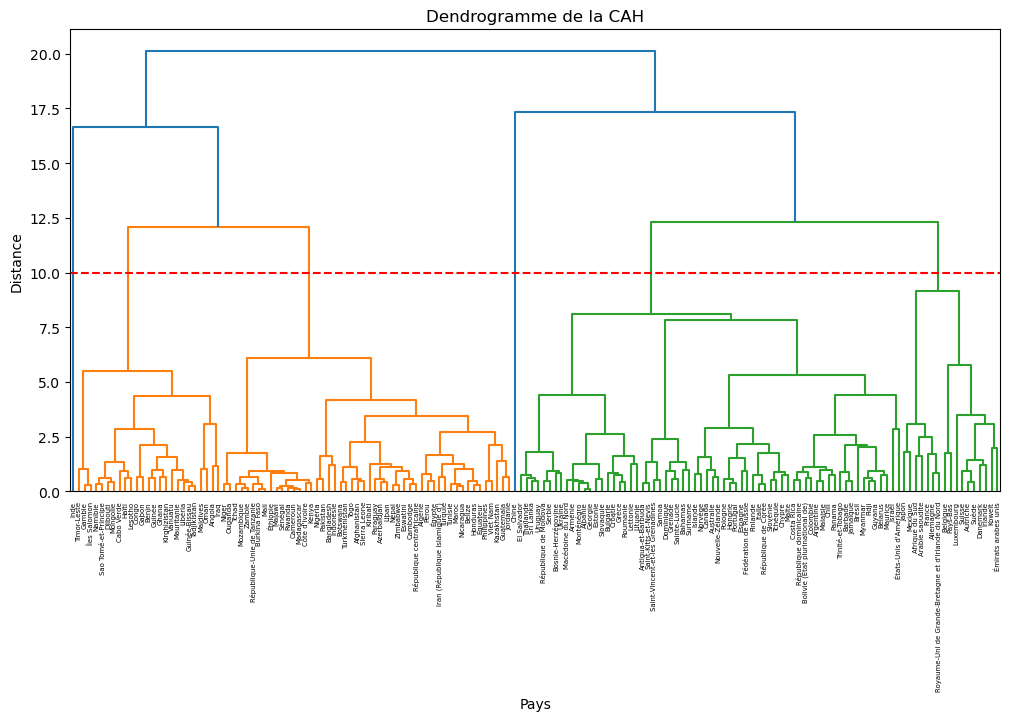

In [113]:
# Observez les distances verticales entre les fusions de clusters dans le dendrogramme. Recherchez les sauts les plus importants 
#Tracé du dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.index)  # Affichage des noms des pays sur l'axe des abscisses
plt.xticks(rotation=90)  # Rotation des noms des pays à 90 degrés pour une meilleure lisibilité
plt.title('Dendrogramme de la CAH')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.axhline(y=10, linestyle='--', color='red')#Aprés identification des + grands sauts
plt.show()


In [114]:
#Nous allons choisir de faire 6 clusters avec la fonction de scipy pour définir les clusters
agg_clustering = AgglomerativeClustering(n_clusters =6)
agg_clustering.fit(df)

AgglomerativeClustering(n_clusters=6)

In [115]:
#creer une colonne pour mettre les clusters generés
df['label'] = agg_clustering.labels_
df.head()

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %,label
Zone,,,,,,,
Afghanistan,-1.021909,-0.305640,0.148850,-0.020172,-0.771441,1.119145,4
Afrique du Sud,0.934298,2.136724,-0.414098,0.140615,-0.280517,0.100036,0
Albanie,-0.308227,-0.267646,0.782986,-0.270437,-0.329363,-1.230185,1
Algérie,-0.732682,-0.418108,-0.912248,0.024680,-0.369182,0.664550,4
Allemagne,-0.073380,3.450237,0.096836,0.358783,1.339597,-0.661303,0


In [116]:
for i in range(6):
    cluster_name = df['label'].unique()[i]
    print(f'cluster {cluster_name}:')
    print(df[df['label'] == cluster_name].index.tolist())
    print()

cluster 4:
['Afghanistan', 'Algérie', 'Azerbaïdjan', 'Bangladesh', 'Belize', 'Botswana', 'Burkina Faso', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Eswatini', 'Guatemala', 'Honduras', 'Indonésie', "Iran (République islamique d')", 'Jordanie', 'Kazakhstan', 'Kenya', 'Kiribati', 'Liban', 'Madagascar', 'Malawi', 'Mali', 'Maroc', 'Mozambique', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Pakistan', 'Paraguay', 'Philippines', 'Pérou', 'Rwanda', 'République centrafricaine', 'République-Unie de Tanzanie', 'Sierra Leone', 'Sénégal', 'Tchad', 'Togo', 'Tunisie', 'Turkménistan', 'Turquie', 'Viet Nam', 'Zambie', 'Zimbabwe', 'Égypte', 'Équateur', 'Éthiopie']

cluster 0:
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Autriche', 'Belgique', 'Danemark', 'France', 'Irlande', 'Japon', 'Koweït', 'Luxembourg', 'Mexique', 'Pays-Bas', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Suisse', 'Suède', 'Émirats arabes unis']

cluster 1:
['Albanie', 'Antigua-et-Barbuda', 'Argentine', 'Armén

Nous allons maintenant analyser la pertinence de notre clustering.

In [117]:
# comprendre la caracterisation des clusters
visu=df.groupby(['label']).mean()
visu

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %
label,,,,,,
0,0.277731,1.570835,0.596438,-0.006573,1.371424,-0.288581
1,0.576683,-0.230386,-0.164293,-0.125572,0.200880,-0.839066
2,-0.588738,-0.102576,1.390889,-0.236087,-0.578152,0.993469
3,-0.969279,-0.428086,-0.927523,11.712327,-0.605127,-0.216263
4,-0.633691,-0.300838,-0.647488,0.046994,-0.565667,0.669790
5,6.555647,7.391843,-0.766443,0.822340,7.904557,1.656828


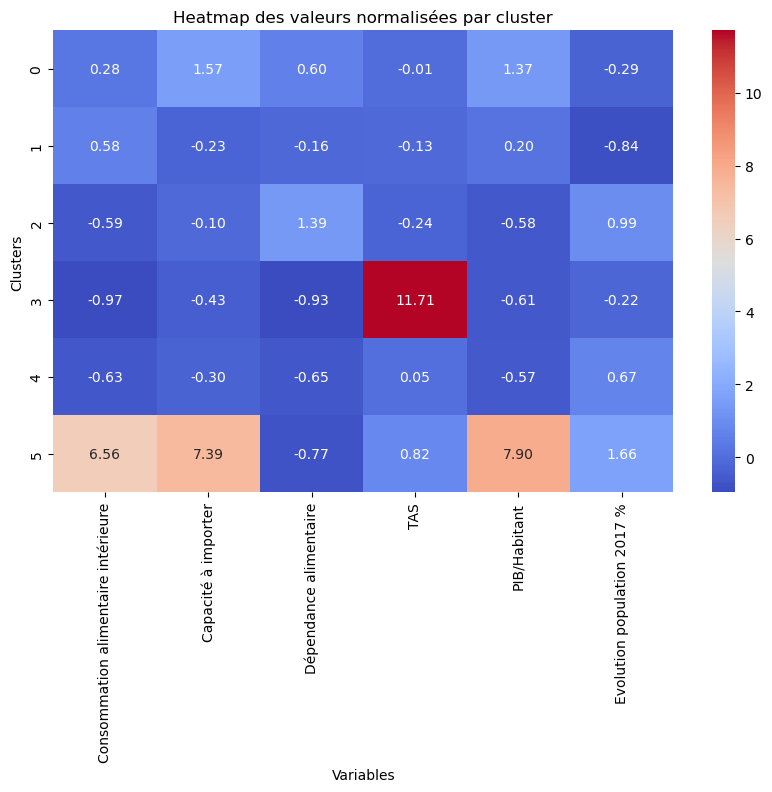

In [118]:
# Afficher le graphique
plt.show()# Créer un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(visu, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap des valeurs normalisées par cluster')
plt.xlabel('Variables')
plt.ylabel('Clusters')
plt.show()


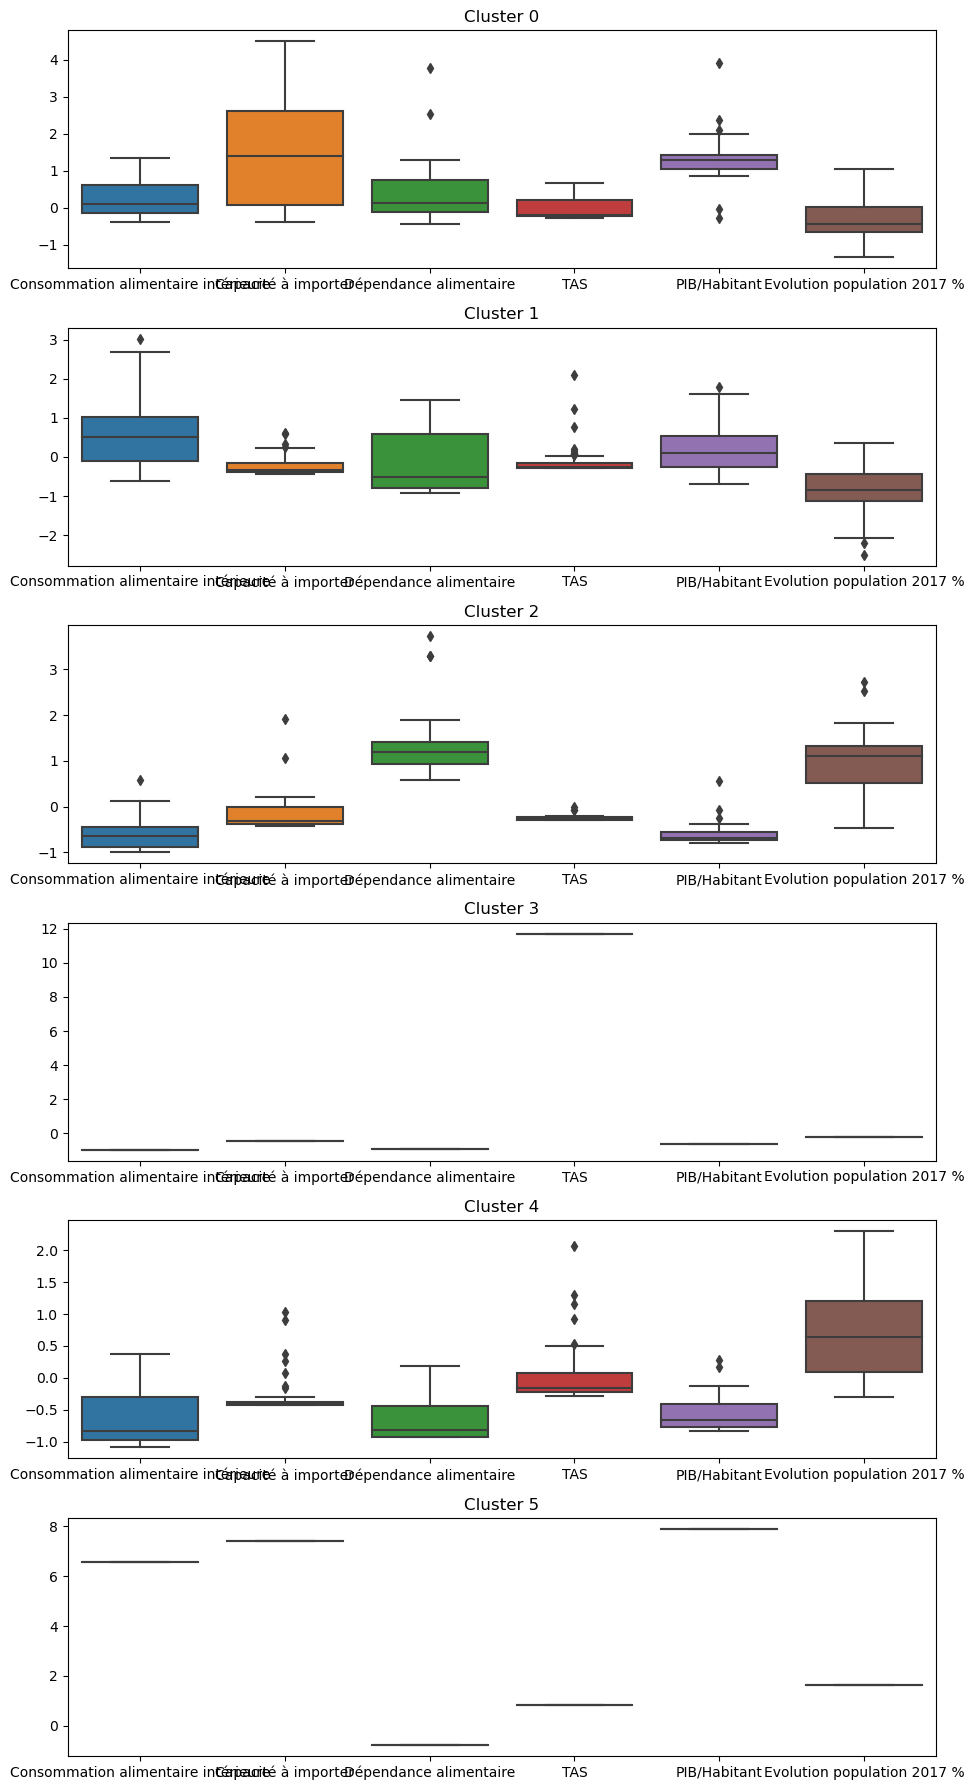

In [119]:
# Créer les boxplots
fig, axes = plt.subplots(6, 1, figsize=(10, 18))  # 6 clusters
plt.subplots_adjust(hspace=0.5)  # Ajuster l'espace vertical entre les sous-graphiques

# Boucle sur les clusters
for i in range(6): 
    # Filtrer les données pour chaque cluster et exclure la colonne 'label'
    sns.boxplot(data=df[df['label'] == i].drop(columns=['label']), ax=axes[i])
    axes[i].set_title(f'Cluster {i}')
plt.tight_layout()
plt.show()

In [120]:
#le cluster le plus interessant pour notre analyse
cluster_0_data= df[df['label'] == 0]

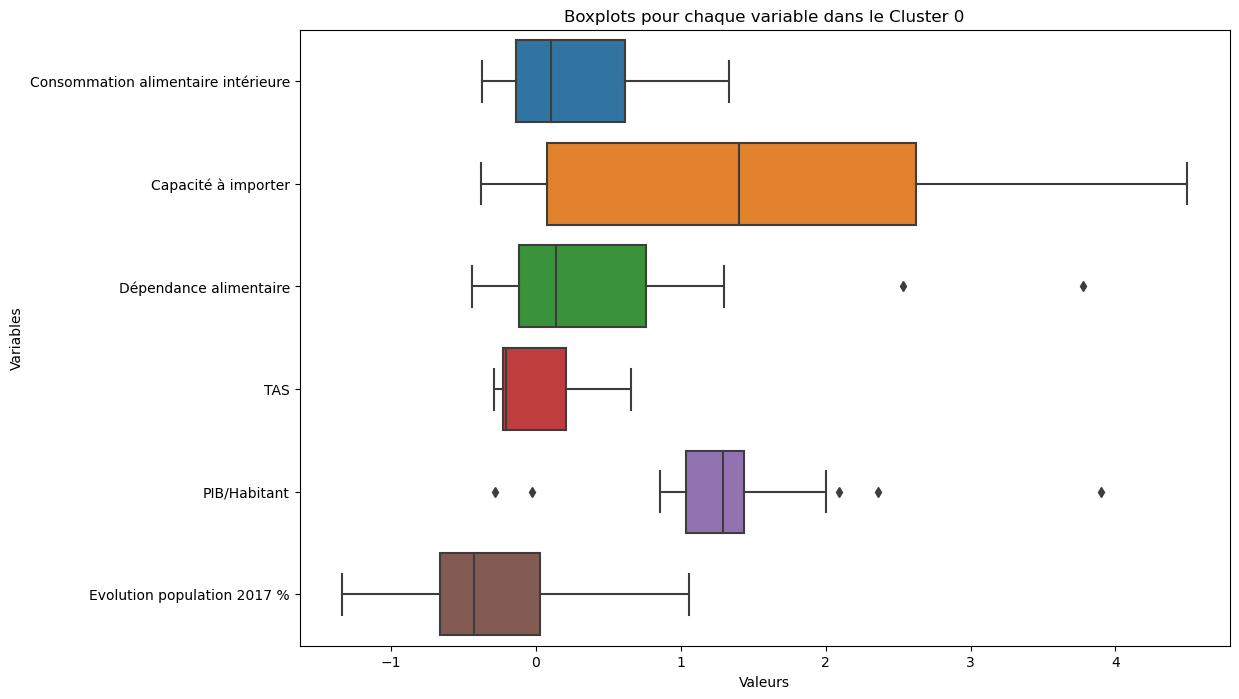

In [121]:
# Observons par ses variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=cluster_0_data.drop(columns=['label']), orient='h')
plt.title('Boxplots pour chaque variable dans le Cluster 0')
plt.xlabel('Valeurs')
plt.ylabel('Variables')
plt.show()

In [122]:
# Trier les pays par capacité à importer en ordre décroissant
cluster_0_sorted1 = cluster_0_data.sort_values(by='Capacité à importer', ascending=False)

# Trier les pays par dependance alimentaire en ordre décroissant
cluster_0_sorted2 = cluster_0_data.sort_values(by='Dépendance alimentaire', ascending=False)

# Trier les pays par consommation moyenne par ordre décroissant
cluster_0_sorted3 = cluster_0_data.sort_values(by='Consommation alimentaire intérieure', ascending=False)

# Trier les pays par Taux d'autosuffisance par ordre croissant
cluster_0_sorted4 = cluster_0_data.sort_values(by='TAS', ascending=True)

#Trier les pays par PIB/Habitant par ordre décroissant
cluster_0_sorted5 = cluster_0_data.sort_values(by='PIB/Habitant',ascending= True)

# Sélectionner les top pays pour chaque indicateur
top_pays_capacite_importer = cluster_0_sorted1.head(1)
top_pays_dependant = cluster_0_sorted2.head(1)
top_pays_conso_moyenne = cluster_0_sorted3.head(1)
top_pays_tas = cluster_0_sorted4.head(1)
top_pays_pib = cluster_0_sorted5.head (1)

# Fusionner les DataFrames pour obtenir les top pays pour chaque indicateur dans un seul DataFrame
top_pays_a_cibler = pd.concat([top_pays_capacite_importer, top_pays_dependant, top_pays_pib, top_pays_tas,top_pays_conso_moyenne]).drop_duplicates()

top_pays_a_cibler

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %,label
Zone,,,,,,,
Japon,-0.124304,4.495820,0.008960,0.658847,0.858077,-1.340898,0
Belgique,-0.376082,1.258507,3.776968,-0.203886,1.230714,-0.652421,0
Afrique du Sud,0.934298,2.136724,-0.414098,0.140615,-0.280517,0.100036,0
Luxembourg,-0.213422,-0.381648,1.188106,-0.286980,3.903654,0.768008,0
Koweït,1.332548,0.202929,0.606028,-0.261603,1.212699,1.054716,0


Ainsi nous avons cibler ces 5 pays.

## Méthode KMEANS

In [123]:
# Ignorer tous les avertissements
import warnings
warnings.filterwarnings("ignore")

K-means est une méthode de regroupement non hiérarchique qui divise les données en k clusters ou k est prédefini, en se basant sur la proximité des points.

In [124]:
# Supprimer la colonne 'label' du DataFrame X
X = df.drop('label', axis=1)
X

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %
Zone,,,,,,
Afghanistan,-1.021909,-0.305640,0.148850,-0.020172,-0.771441,1.119145
Afrique du Sud,0.934298,2.136724,-0.414098,0.140615,-0.280517,0.100036
Albanie,-0.308227,-0.267646,0.782986,-0.270437,-0.329363,-1.230185
Algérie,-0.732682,-0.418108,-0.912248,0.024680,-0.369182,0.664550
Allemagne,-0.073380,3.450237,0.096836,0.358783,1.339597,-0.661303
...,...,...,...,...,...,...
Émirats arabes unis,0.996422,1.400132,1.295941,-0.222360,2.089621,0.030548
Équateur,0.002700,-0.428094,-0.927523,-0.162808,-0.374569,0.415630
États-Unis d'Amérique,2.071211,0.185650,-0.913277,2.096527,1.622997,-0.594907


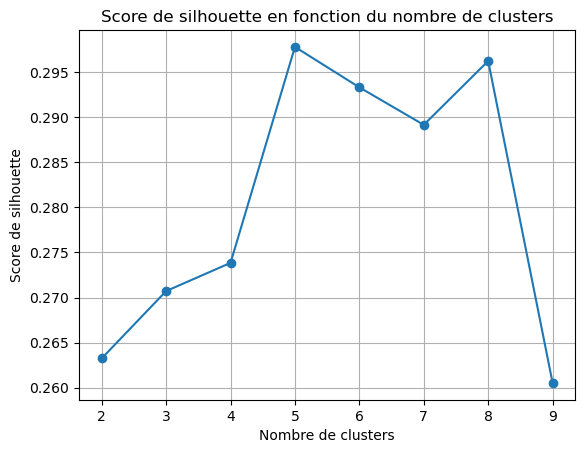

In [125]:
# Définir la plage de nombres de clusters à tester
range_n_clusters = range(2, 10)

# Initialiser une liste pour stocker les scores de silhouette pour chaque nombre de clusters
silhouette_scores = []

# Calculer le score de silhouette pour chaque nombre de clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique des scores de silhouette en fonction du nombre de clusters
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters')
plt.grid(True)
plt.show()


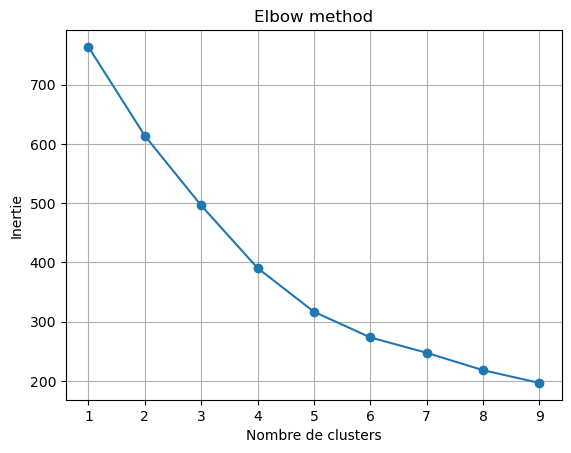

In [126]:
#Appliquer kmeans
cluster_range=[2,3,4,5,6,7,8,9,10]
inertie=[]

for c in cluster_range:
    kmeans=KMeans(init='k-means++',n_clusters=c).fit(X)
    inertie.append(kmeans.inertia_)
    
# Tracer le graphique d'inertie en fonction du nombre de clusters
plt.plot(range(1, 10), inertie, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Elbow method')
plt.grid(True)
plt.show()


In [127]:
#On part sur 6 clusters
kmeans=KMeans(n_clusters=6).fit(X)

#affecter les cluster à la varialb e labels
labels=kmeans.labels_

#créer un dataset qui contient les valeurs de dfa_std
new_dfa=pd.DataFrame(data=X,columns=['Consommation alimentaire intérieure','Capacité à importer','Dépendance alimentaire','TAS','PIB/Habitant','Evolution population 2017 %'])

#rajouter les labels à mon dataset dfa_std
new_dfa['labels_kmeans']=labels

new_dfa

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %,labels_kmeans
Zone,,,,,,,
Afghanistan,-1.021909,-0.305640,0.148850,-0.020172,-0.771441,1.119145,3
Afrique du Sud,0.934298,2.136724,-0.414098,0.140615,-0.280517,0.100036,5
Albanie,-0.308227,-0.267646,0.782986,-0.270437,-0.329363,-1.230185,1
Algérie,-0.732682,-0.418108,-0.912248,0.024680,-0.369182,0.664550,3
Allemagne,-0.073380,3.450237,0.096836,0.358783,1.339597,-0.661303,5
...,...,...,...,...,...,...,...
Émirats arabes unis,0.996422,1.400132,1.295941,-0.222360,2.089621,0.030548,5
Équateur,0.002700,-0.428094,-0.927523,-0.162808,-0.374569,0.415630,3
États-Unis d'Amérique,2.071211,0.185650,-0.913277,2.096527,1.622997,-0.594907,1


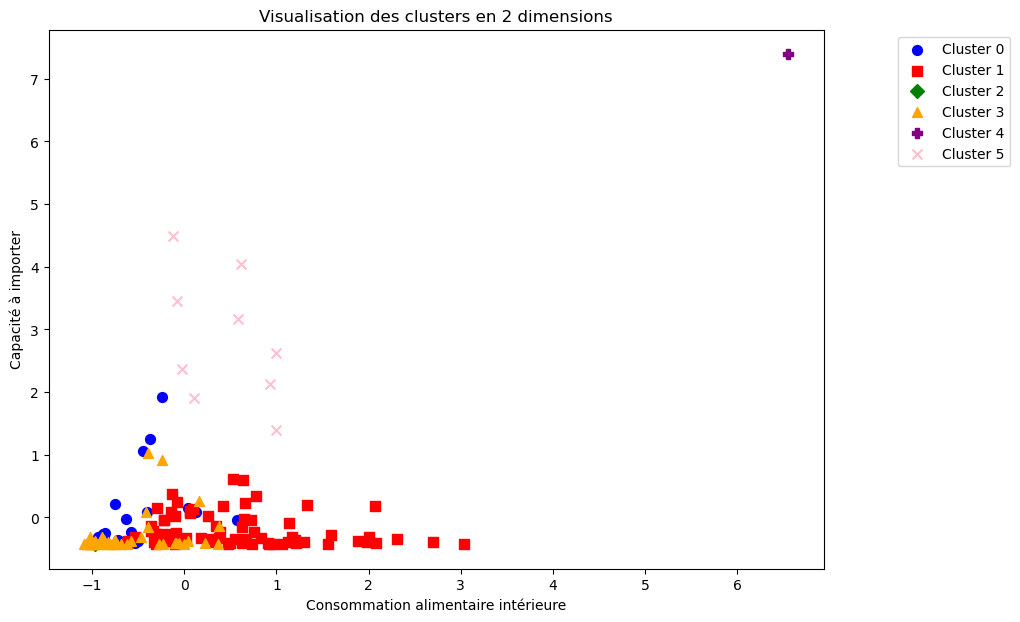

In [128]:
# Définir les couleurs et les marqueurs pour chaque cluster
colors = ['blue', 'red', 'green', 'orange', 'purple', 'pink']
markers = ['o', 's', 'D', '^', 'P', 'x']

# Créer le graphique
fig, ax = plt.subplots(figsize=[10,7])

# Itérer à travers les clusters
for cluster_label, color, marker in zip(range(6), colors, markers):
    cluster_data = new_dfa[new_dfa['labels_kmeans'] == cluster_label]
    # Tracer les points du cluster avec une couleur et un marqueur spécifique
    ax.scatter(cluster_data['Consommation alimentaire intérieure'], cluster_data['Capacité à importer'], 
               color=color, s=50, marker=marker, label=f'Cluster {cluster_label}')

# Ajouter une légende, des étiquettes et un titre
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
ax.set_xlabel('Consommation alimentaire intérieure')
ax.set_ylabel('Capacité à importer')
ax.set_title('Visualisation des clusters en 2 dimensions')

# Afficher le graphique
plt.show()

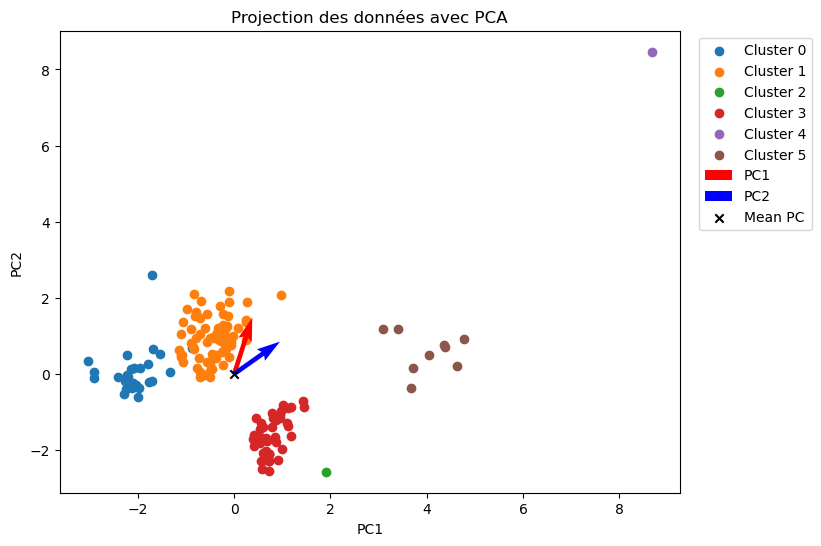

In [129]:
# Projection 
from sklearn.decomposition import PCA

# Instancier l'objet PCA avec le nombre de composantes désiré
pca = PCA(n_components=2)

# Appliquer la transformation PCA sur les données
projection = pca.fit_transform(new_dfa)

# Créer un DataFrame pour la projection avec les noms de colonnes appropriés
projection_df = pd.DataFrame(projection, columns=['PC1', 'PC2'])

# Ajouter les labels des clusters à la projection
projection_df['labels_kmeans'] = labels

# Calculer les moyennes des composantes principales
mean_PC1 = np.mean(projection_df['PC1'])
mean_PC2 = np.mean(projection_df['PC2'])

# Tracer le graphique des composantes principales PC1 et PC2
plt.figure(figsize=(8, 6))
for cluster_label in range(6):
    # Points de données pour le cluster
    cluster_data = projection_df[projection_df['labels_kmeans'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

# Ajouter les composantes principales
plt.quiver(0, 0, pca.components_[0,0], pca.components_[1,0], scale=6, color='r', label='PC1')
plt.quiver(0, 0, pca.components_[0,1], pca.components_[1,1], scale=6, color='b', label='PC2')

# on plot
plt.scatter(mean_PC1, mean_PC2, color='black', marker='x', label='Mean PC')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des données avec PCA')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [130]:
# Interprétation des groupes
# Afficher les statistiques des clusters
cluster_stats = new_dfa.groupby('labels_kmeans')[X.columns].mean()
cluster_stats

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %
labels_kmeans,,,,,,
0,-0.580559,-0.050227,1.482662,-0.234848,-0.508580,0.930166
1,0.543090,-0.199256,-0.084201,-0.137672,0.374235,-0.753651
2,-0.969279,-0.428086,-0.927523,11.712327,-0.605127,-0.216263
3,-0.643344,-0.316867,-0.669731,0.047949,-0.575009,0.654085
4,6.555647,7.391843,-0.766443,0.822340,7.904557,1.656828
5,0.443960,2.843038,0.308663,0.200741,0.943280,-0.425570


Le cluster 4 ET 5 a exclure ce sont des outliers Le Cluster 0 intéressant 

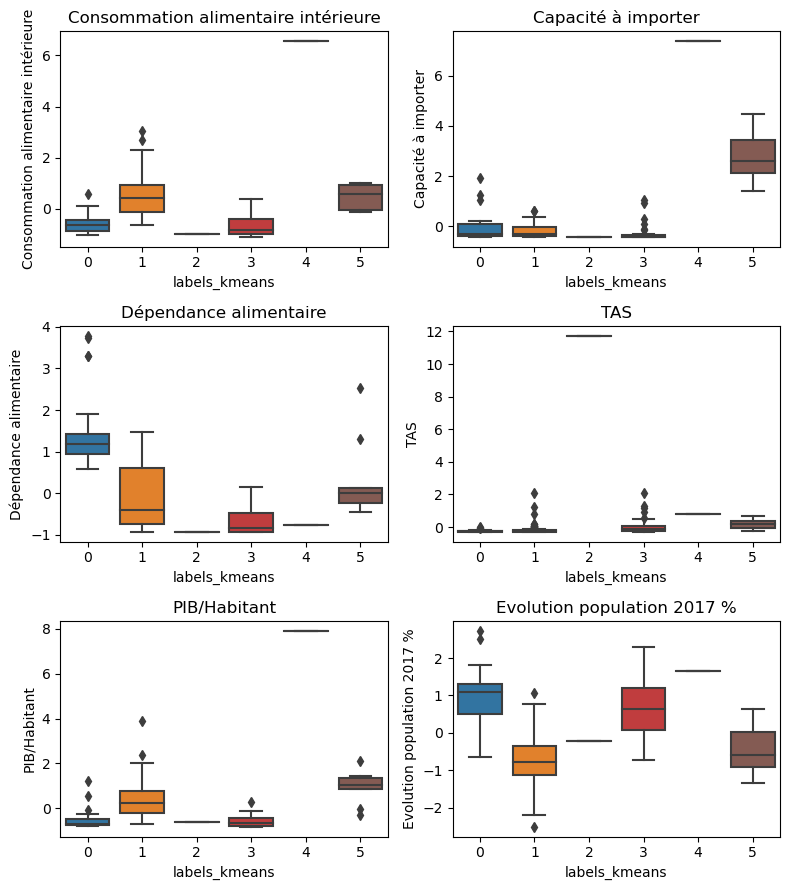

In [132]:
# Créer un boxplot pour chaque colonne numérique
# Exclure les colonnes 'cluster' et 'cls'
columns_to_plot =new_dfa.drop(['labels_kmeans'], axis=1).columns

num_cols = len(columns_to_plot)
# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(8, 3 * num_rows))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='labels_kmeans', y=column, data=new_dfa)
    plt.title(column)

plt.tight_layout()
plt.show()

In [133]:
crosstab_df = new_dfa.groupby('labels_kmeans').mean()
crosstab_df

,Consommation alimentaire intérieure,Capacité à importer,Dépendance alimentaire,TAS,PIB/Habitant,Evolution population 2017 %
labels_kmeans,,,,,,
0,-0.580559,-0.050227,1.482662,-0.234848,-0.508580,0.930166
1,0.543090,-0.199256,-0.084201,-0.137672,0.374235,-0.753651
2,-0.969279,-0.428086,-0.927523,11.712327,-0.605127,-0.216263
3,-0.643344,-0.316867,-0.669731,0.047949,-0.575009,0.654085
4,6.555647,7.391843,-0.766443,0.822340,7.904557,1.656828
5,0.443960,2.843038,0.308663,0.200741,0.943280,-0.425570


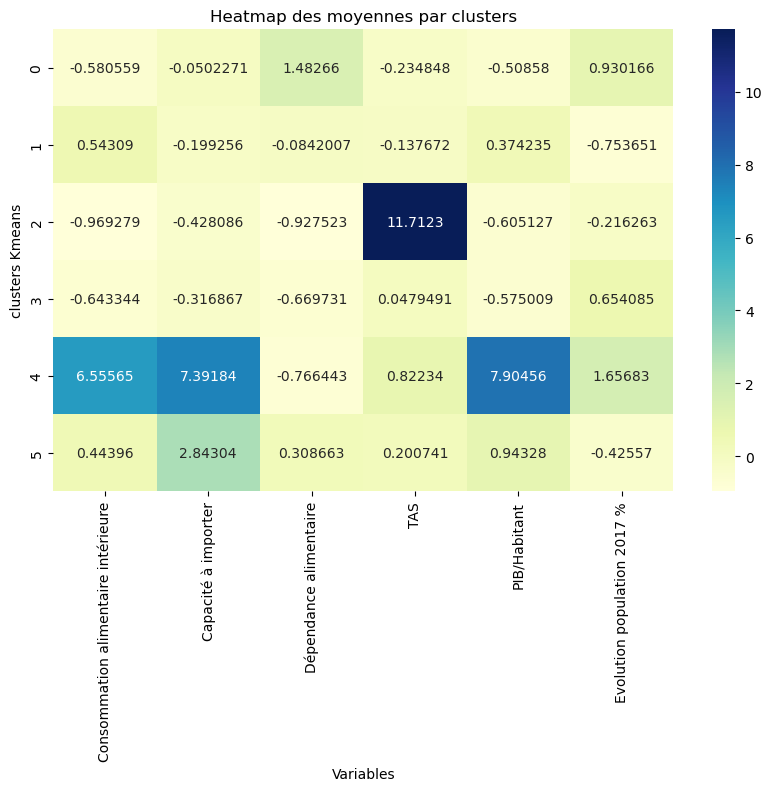

In [134]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap des moyennes par clusters')
plt.xlabel('Variables')
plt.ylabel('clusters Kmeans')
plt.show()

In [135]:
for i in range(6):
    cluster_name = new_dfa['labels_kmeans'].unique()[i]
    print(f'cluster {cluster_name}:')
    print(new_dfa[new_dfa['labels_kmeans'] == cluster_name].index.tolist())
    print()

cluster 3:
['Afghanistan', 'Algérie', 'Azerbaïdjan', 'Bangladesh', 'Belize', 'Botswana', 'Burkina Faso', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Eswatini', 'Guatemala', 'Honduras', 'Indonésie', "Iran (République islamique d')", 'Jordanie', 'Kenya', 'Kiribati', 'Liban', 'Madagascar', 'Malawi', 'Mali', 'Maroc', 'Mozambique', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Pakistan', 'Paraguay', 'Philippines', 'Pérou', 'Rwanda', 'République centrafricaine', 'République-Unie de Tanzanie', 'Sierra Leone', 'Sri Lanka', 'Sénégal', 'Tchad', 'Togo', 'Tunisie', 'Turkménistan', 'Turquie', 'Viet Nam', 'Zambie', 'Zimbabwe', 'Égypte', 'Équateur', 'Éthiopie']

cluster 5:
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'France', 'Japon', 'Mexique', 'Pays-Bas', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis']

cluster 1:
['Albanie', 'Antigua-et-Barbuda', 'Argentine', 'Arménie', 'Australie', 'Autriche', 'Bahamas', 'Barbade', 'Bolivie (État plurinational de)', 'Bos

Le Premier cluster 'cluster 0' contient les pays à cibler.

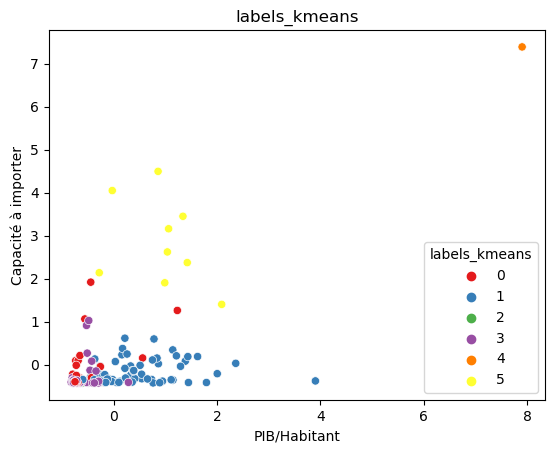

In [136]:
# Visualisation des groupes
sns.scatterplot(data=new_dfa, x='PIB/Habitant', y='Capacité à importer', hue='labels_kmeans', palette='Set1')
plt.title("labels_kmeans")
plt.show()

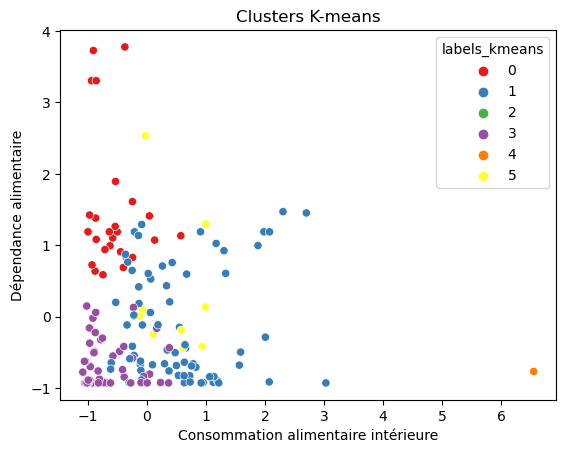

In [137]:
# Visualisation des groupes
sns.scatterplot(data=new_dfa, x='Consommation alimentaire intérieure', y='Dépendance alimentaire', hue='labels_kmeans', palette='Set1')
plt.title("Clusters K-means")
plt.show()

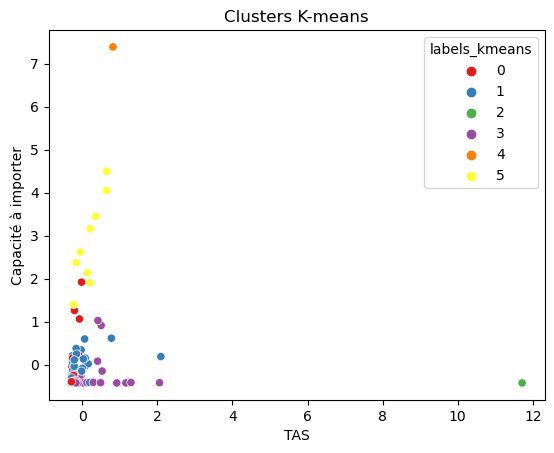

In [138]:
# Visualisation des groupes
sns.scatterplot(data=new_dfa, x='TAS', y='Capacité à importer', hue='labels_kmeans', palette='Set1')
plt.title("Clusters K-means")
plt.show()

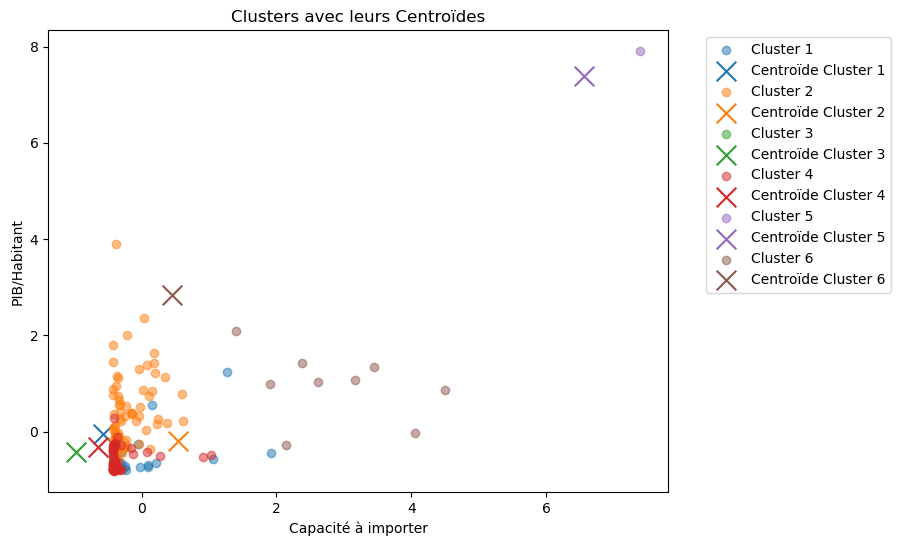

In [139]:
# Tracer les points de données pour chaque cluster et leurs centroïdes correspondants
num_clusters=6
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    # Points de données pour le cluster i
    cluster_data = new_dfa[new_dfa['labels_kmeans'] == i]
    plt.scatter(cluster_data['Capacité à importer'], cluster_data['PIB/Habitant'], alpha=0.5, label=f'Cluster {i+1}', c=f'C{i}')
    
    # Centroïde du cluster i
    centroid_cluster_i = centroids[i]  
    plt.scatter(centroid_cluster_i[0], centroid_cluster_i[1], marker='x', s=200, label=f'Centroïde Cluster {i+1}', c=f'C{i}', edgecolors='k')

plt.title('Clusters avec leurs Centroïdes')
plt.xlabel('Capacité à importer')
plt.ylabel('PIB/Habitant')

# Placer la légende en dehors du scatter plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [142]:
# Sélectionner les index des pays qui appartiennent au cluster 0
cluster_0_indices = new_dfa[new_dfa['labels_kmeans'] == 0].index

# Afficher les noms des pays du cluster 0
print("Pays à cibler :")
for index in cluster_0_indices:
    print(index)


Pays à cibler :
Angola
Belgique
Bénin
Cabo Verde
Congo
Djibouti
Gabon
Gambie
Ghana
Guinée
Guinée-Bissau
Haïti
Iraq
Kirghizistan
Lesotho
Libéria
Maldives
Mauritanie
Mongolie
Namibie
Oman
Sao Tomé-et-Principe
Tadjikistan
Timor-Leste
Vanuatu
Îles Salomon


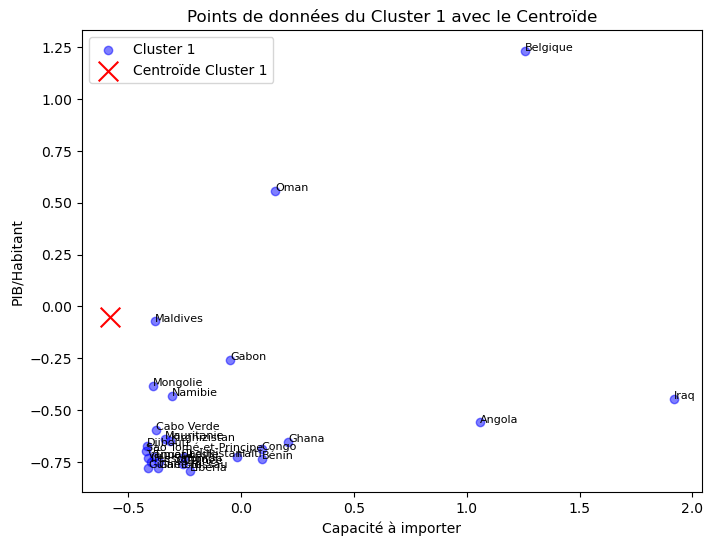

In [143]:
# Sélectionner uniquement les données du cluster 0
cluster_0_data = new_dfa[new_dfa['labels_kmeans'] == 0]

# Sélectionner le centroïde du cluster 0
centroid_cluster_0 = centroids[0]

plt.figure(figsize=(8, 6))

# Tracer les points de données du cluster 0
plt.scatter(cluster_0_data['Capacité à importer'], cluster_0_data['PIB/Habitant'], alpha=0.5, label='Cluster 1', c='blue')

# Tracer le centroïde du cluster 0
plt.scatter(centroid_cluster_0[0], centroid_cluster_0[1], marker='x', s=200, label='Centroïde Cluster 1', c='red', edgecolors='k')

# Afficher le nom des pays en points
for index, row in cluster_0_data.iterrows():
    plt.text(row['Capacité à importer'], row['PIB/Habitant'], index, fontsize=8)

plt.title('Points de données du Cluster 1 avec le Centroïde')
plt.xlabel('Capacité à importer')
plt.ylabel('PIB/Habitant')

# Afficher la légende
plt.legend()

plt.show()
